In [ ]:
import zipfile

zip_path = "/content/archive.zip"
extract_path = "/content/dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted successfully!")


Dataset extracted successfully!


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
df = pd.read_csv("/content/dataset/teen_phone_addiction_dataset.csv")

df.head()


,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      3000 non-null   int64  
 1   Name                    3000 non-null   object 
 2   Age                     3000 non-null   int64  
 3   Gender                  3000 non-null   object 
 4   Location                3000 non-null   object 
 5   School_Grade            3000 non-null   object 
 6   Daily_Usage_Hours       3000 non-null   float64
 7   Sleep_Hours             3000 non-null   float64
 8   Academic_Performance    3000 non-null   int64  
 9   Social_Interactions     3000 non-null   int64  
 10  Exercise_Hours          3000 non-null   float64
 11  Anxiety_Level           3000 non-null   int64  
 12  Depression_Level        3000 non-null   int64  
 13  Self_Esteem             3000 non-null   int64  
 14  Parental_Control        3000 non-null   

In [ ]:
df.describe()


,ID,Age,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,Depression_Level,Self_Esteem,Parental_Control,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Family_Communication,Weekend_Usage_Hours,Addiction_Level
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,15.969667,5.020667,6.489767,74.947333,5.097667,1.040667,5.590000,5.460333,5.546333,0.507333,1.006733,83.093000,12.609333,2.499233,1.525267,1.016333,5.459667,6.015100,8.881900
std,866.169729,1.989489,1.956501,1.490713,14.684156,3.139333,0.734620,2.890678,2.871557,2.860754,0.500030,0.492878,37.747044,4.611486,0.988201,0.932701,0.648341,2.864572,2.014776,1.609598
min,1.000000,13.000000,0.000000,3.000000,50.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,20.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,750.750000,14.000000,3.700000,5.500000,62.000000,2.000000,0.500000,3.000000,3.000000,3.000000,0.000000,0.700000,51.000000,9.000000,1.800000,0.800000,0.500000,3.000000,4.700000,8.000000
50%,1500.500000,16.000000,5.000000,6.500000,75.000000,5.000000,1.000000,6.000000,5.000000,6.000000,1.000000,1.000000,82.000000,13.000000,2.500000,1.500000,1.000000,5.000000,6.000000,10.000000
75%,2250.250000,18.000000,6.400000,7.500000,88.000000,8.000000,1.500000,8.000000,8.000000,8.000000,1.000000,1.400000,115.250000,17.000000,3.200000,2.200000,1.500000,8.000000,7.400000,10.000000
max,3000.000000,19.000000,11.500000,10.000000,100.000000,10.000000,4.000000,10.000000,10.000000,10.000000,1.000000,2.600000,150.000000,20.000000,5.000000,4.000000,3.000000,10.000000,14.000000,10.000000


In [ ]:
df.isnull().sum()


,0
ID,0
Name,0
Age,0
Gender,0
Location,0
School_Grade,0
Daily_Usage_Hours,0
Sleep_Hours,0
Academic_Performance,0
Social_Interactions,0


In [ ]:
temp_df = df.copy()
le = LabelEncoder()

for col in temp_df.columns:
    if temp_df[col].dtype == 'object':
        temp_df[col] = le.fit_transform(temp_df[col])


In [ ]:
correlation = temp_df.corr()[temp_df.columns[-1]].sort_values()
correlation


,Addiction_Level
Sleep_Hours,-0.216681
Gender,-0.031494
Self_Esteem,-0.022292
Exercise_Hours,-0.021015
Name,-0.019186
Phone_Usage_Purpose,-0.017973
Weekend_Usage_Hours,-0.013049
Social_Interactions,-0.010631
Family_Communication,-0.010482
ID,-0.007263


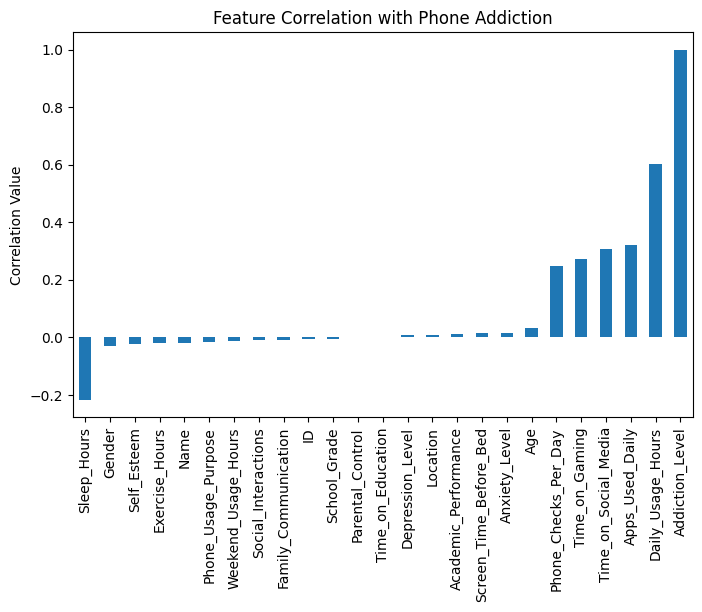

In [ ]:
plt.figure(figsize=(8,5))
correlation.plot(kind='bar')
plt.title("Feature Correlation with Phone Addiction")
plt.ylabel("Correlation Value")
plt.show()


In [ ]:
low_corr_features = correlation[abs(correlation) < 0.05].index
low_corr_features


Index(['Gender', 'Self_Esteem', 'Exercise_Hours', 'Name',
       'Phone_Usage_Purpose', 'Weekend_Usage_Hours', 'Social_Interactions',
       'Family_Communication', 'ID', 'School_Grade', 'Parental_Control',
       'Time_on_Education', 'Depression_Level', 'Location',
       'Academic_Performance', 'Screen_Time_Before_Bed', 'Anxiety_Level',
       'Age'],
      dtype='object')

In [ ]:
df.drop(columns=low_corr_features, inplace=True)


In [ ]:
label_encoder = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col])


In [ ]:
df.iloc[:, -1].head()


,Addiction_Level
0,10.0
1,10.0
2,9.2
3,9.8
4,8.6


In [ ]:
df.rename(columns={df.columns[-1]: "AddictionScore"}, inplace=True)

def addiction_level(score):
    if score <= 4:
        return "Low"
    elif score <= 5:
        return "Medium"
    else:
        return "High"

df["AddictionLevel"] = df["AddictionScore"].apply(addiction_level)


In [ ]:
df.drop(columns=["AddictionScore"], inplace=True)

In [ ]:
le_target = LabelEncoder()
df["AddictionLevel"] = le_target.fit_transform(df["AddictionLevel"])


In [ ]:
X = df.drop(columns=["AddictionLevel"])
y = df["AddictionLevel"]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [ ]:
model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.955
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       557
           1       0.00      0.00      0.00         2
           2       0.71      0.59      0.64        41

    accuracy                           0.95       600
   macro avg       0.56      0.52      0.54       600
weighted avg       0.95      0.95      0.95       600



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


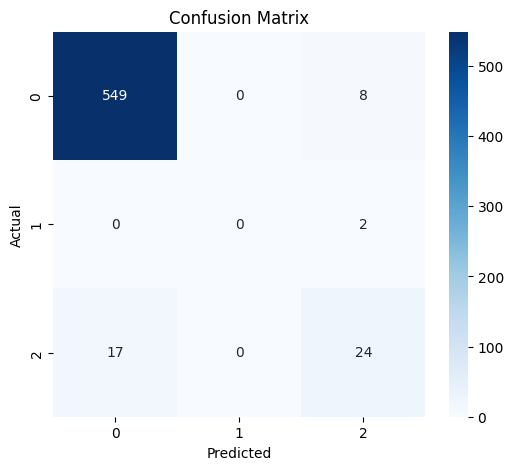

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import joblib

# Save trained model
joblib.dump(model, "phone_addiction_model.pkl")

# Save scaler (VERY IMPORTANT)
joblib.dump(scaler, "scaler.pkl")

print("Model and scaler saved successfully!")


Model and scaler saved successfully!


In [ ]:
X.columns

Index(['Daily_Usage_Hours', 'Sleep_Hours', 'Phone_Checks_Per_Day',
       'Apps_Used_Daily', 'Time_on_Social_Media', 'Time_on_Gaming'],
      dtype='object')

In [ ]:
df.head()


,Daily_Usage_Hours,Sleep_Hours,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,AddictionLevel
0,4.0,6.1,86,19,3.6,1.7,0
1,5.5,6.5,96,9,1.1,4.0,0
2,5.8,5.5,137,8,0.3,1.5,0
3,3.1,3.9,128,7,3.1,1.6,0
4,2.5,6.7,96,20,2.6,0.9,0


In [ ]:
row_no = 5

# Get the single row from the original DataFrame, containing only the features used for training
# X contains the feature columns after all preprocessing
input_data_row = df.iloc[row_no][X.columns].copy()

# Convert the Series to a DataFrame with a single row and ensure column names are preserved
input_data_df = pd.DataFrame([input_data_row])

# Apply the scaler (use the 'scaler' variable from previous cells)
input_data_scaled = scaler.transform(input_data_df)

print("Input taken from dataset (row", row_no, "):")
print(input_data_row)

Input taken from dataset (row 5 ):
Daily_Usage_Hours         3.9
Sleep_Hours               6.3
Phone_Checks_Per_Day    135.0
Apps_Used_Daily           8.0
Time_on_Social_Media      3.8
Time_on_Gaming            0.0
Name: 5, dtype: float64


In [ ]:
prediction = model.predict(input_data_scaled)

print("Model Raw Output:", prediction[0])

Model Raw Output: 0


In [ ]:
predicted_category = le_target.inverse_transform([prediction[0]])[0]

# Map to 'Addicted'/'Not Addicted' based on the categories
# Assuming 'Low' is Not Addicted, 'Medium' and 'High' are Addicted
if predicted_category == 'Low':
    result_message = "Not Addicted"
else:
    result_message = "Addicted"

# Note: `st.success` is a Streamlit function. If running this cell directly in Colab, `st` would not be defined.
# For a Colab environment, consider replacing `st.success(...)` with `print(...)`.
print(f"Predicted Addiction Category: {predicted_category} ({result_message})")

Predicted Addiction Category: High (Addicted)


In [ ]:
!pip install streamlit -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 109.3 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import numpy as np
import joblib

# Load model & scaler
model = joblib.load("phone_addiction_model.pkl")
scaler = joblib.load("scaler.pkl")

st.set_page_config(page_title="📱 Smartphone Addiction Predictor")

st.title("📱 Smartphone Addiction Prediction")
st.write("Fill in the details below to predict phone addiction level.")

st.divider()

# ---------------- USER INPUTS ----------------

daily_usage = st.number_input(
    "Daily Phone Usage (hours)",
    min_value=0.0,
    max_value=24.0,
    step=0.1
)

sleep_hours = st.number_input(
    "Sleep Hours per Day",
    min_value=0.0,
    max_value=24.0,
    step=0.1
)

phone_checks = st.number_input(
    "Phone Checks Per Day",
    min_value=0,
    step=1
)

apps_used = st.number_input(
    "Apps Used Daily",
    min_value=0,
    step=1
)

social_media_time = st.number_input(
    "Time on Social Media (hours/day)",
    min_value=0.0,
    max_value=24.0,
    step=0.1
)

gaming_time = st.number_input(
    "Time on Gaming (hours/day)",
    min_value=0.0,
    max_value=24.0,
    step=0.1
)

# ---------------- PREDICTION ----------------

if st.button("🔍 Predict Addiction Level"):

    # MUST match training feature order
    input_data = np.array([[
        daily_usage,
        sleep_hours,
        phone_checks,
        apps_used,
        social_media_time,
        gaming_time
    ]])

    # Scale input
    input_scaled = scaler.transform(input_data)


    # Predict
    prediction = model.predict(input_scaled)[0]

    # Output
    if prediction == 0:
        st.error("🔴 Addiction Level: HIGH")
    elif prediction == 1:
        st.warning("🟡 Addiction Level: MEDIUM")
    else:
        st.success("🟢 Addiction Level: LOW")


Writing app.py


In [ ]:
!npm install -g localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴
added 22 packages in 3s
⠴
⠴3 packages are looking for funding
⠴  run `npm fund` for details
⠴npm notice
npm notice New major version of npm available! 10.8.2 -> 11.7.0
npm notice Changelog: https://github.com/npm/cli/releases/tag/v11.7.0
npm notice To update run: npm install -g npm@11.7.0
npm notice
⠴

In [ ]:
import urllib
print("Your Password/Endpoint IP is:", urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip())


!streamlit run app.py --server.port 8501 --server.enableCORS=false & lt --port 8501

Your Password/Endpoint IP is: 34.73.186.64
your url is: https://bitter-mangos-stop.loca.lt
2025-12-29 08:48:04.959 
'server.enableXsrfProtection=true'.
As a result, 'server.enableCORS' is being overridden to 'true'.

More information:
In order to protect against CSRF attacks, we send a cookie with each request.
To do so, we must specify allowable origins, which places a restriction on
cross-origin resource sharing.

If cross origin resource sharing is required, please disable server.enableXsrfProtection.
            



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.73.186.64:8501



In [ ]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)